In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()




pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)



TARGET_F = "TARGET_CLM_FLAG"
TARGET_A = "TARGET_CLM_AMT"




INFILE = "/content/MSDS 422/Unit 1/Insurance.csv"

df = pd.read_csv( INFILE )




'''
Print a transpose of the data so that it will fit on the screen
'''
print( df.head() )
print( df.head(3).T )

   TARGET_CLM_FLAG  TARGET_CLM_AMT  KIDSDRIV   AGE  HOMEKIDS   YOJ   INCOME PARENT1  HOME_VAL  \
0                0             NaN         0  51.0         0  12.0  85076.0      No  249276.0   
1                1          6872.0         0  37.0         0  10.0  55076.0      No  245993.0   
2                1          6716.0         3  36.0         4   0.0      NaN      No       0.0   
3                0             NaN         0  52.0         0  12.0  68564.0      No  274122.0   
4                1          5970.0         0  33.0         4  14.0  30504.0     Yes       0.0   

  MSTATUS SEX         EDUCATION          JOB  TRAVTIME     CAR_USE  BLUEBOOK  TIF  NPOLICY  \
0     Yes   F       c_Bachelors      Manager        25     Private     25860    4        2   
1     Yes   M     d_High School     Clerical        23     Private     16400    4        2   
2     Yes   F     d_High School      Student        54     Private      1500    4        2   
3     Yes   M     d_High School  Blue Col

In [ ]:
'''
print the data types and if we wish to change some, this is how to do it.
'''
print( df.dtypes )
df["HOMEKIDS"] = df["HOMEKIDS"].astype(float)
df["TIF"] = df["TIF"].astype(float)
df.TIF = df.TIF.astype(float)
print( df.dtypes )




TARGET_CLM_FLAG      int64
TARGET_CLM_AMT     float64
KIDSDRIV             int64
AGE                float64
HOMEKIDS             int64
YOJ                float64
INCOME             float64
PARENT1             object
HOME_VAL           float64
MSTATUS             object
SEX                 object
EDUCATION           object
JOB                 object
TRAVTIME             int64
CAR_USE             object
BLUEBOOK             int64
TIF                  int64
NPOLICY              int64
CAR_TYPE            object
RED_CAR             object
OLDCLAIM             int64
CLM_FREQ             int64
REVOKED             object
MVR_PTS              int64
CAR_AGE            float64
URBANICITY          object
dtype: object
TARGET_CLM_FLAG      int64
TARGET_CLM_AMT     float64
KIDSDRIV             int64
AGE                float64
HOMEKIDS           float64
YOJ                float64
INCOME             float64
PARENT1             object
HOME_VAL           float64
MSTATUS             object
SEX           

In [ ]:

'''
Statistical description of data transposed so that it fits on the screen.
'''
print( df.describe() )
print("\n\n\n")
print( df.describe().T )
print("\n\n\n")
x = df.describe().T
print( x )
print("\n\n\n")


       TARGET_CLM_FLAG  TARGET_CLM_AMT      KIDSDRIV           AGE      HOMEKIDS          YOJ  \
count     10302.000000     2746.000000  10302.000000  10295.000000  10302.000000  9754.000000   
mean          0.266550     5669.725783      0.169288     44.837397      0.720443    10.474062   
std           0.442177     7759.059757      0.506512      8.606445      1.116323     4.108943   
min           0.000000       30.000000      0.000000     16.000000      0.000000     0.000000   
25%           0.000000     2641.000000      0.000000     39.000000      0.000000     9.000000   
50%           0.000000     4107.500000      0.000000     45.000000      0.000000    11.000000   
75%           1.000000     5727.750000      0.000000     51.000000      1.000000    13.000000   
max           1.000000   123247.000000      4.000000     81.000000      5.000000    23.000000   

              INCOME       HOME_VAL      TRAVTIME      BLUEBOOK           TIF       NPOLICY  \
count    9732.000000    9727.00

In [ ]:

'''
Find the variables that are objects (strings), integers, and floats. Put their in a list.
'''

print( df.dtypes )
dt = df.dtypes
print( dt )

objList = []
intList = []
floatList = []

for i in dt.index :
    #print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64"]) : floatList.append( i )
    if dt[i] in (["int64"]) : intList.append( i )



print(" OBJECTS ")
print(" ------- ")
for i in objList :
   print(i)

print(" INTEGER ")
print(" ------- ")
for i in intList :
   print(i)

print(" FLOAT ")
print(" ----- ")
for i in floatList :
   print(i)



TARGET_CLM_FLAG      int64
TARGET_CLM_AMT     float64
KIDSDRIV             int64
AGE                float64
HOMEKIDS           float64
YOJ                float64
INCOME             float64
PARENT1             object
HOME_VAL           float64
MSTATUS             object
SEX                 object
EDUCATION           object
JOB                 object
TRAVTIME             int64
CAR_USE             object
BLUEBOOK             int64
TIF                float64
NPOLICY              int64
CAR_TYPE            object
RED_CAR             object
OLDCLAIM             int64
CLM_FREQ             int64
REVOKED             object
MVR_PTS              int64
CAR_AGE            float64
URBANICITY          object
dtype: object
TARGET_CLM_FLAG      int64
TARGET_CLM_AMT     float64
KIDSDRIV             int64
AGE                float64
HOMEKIDS           float64
YOJ                float64
INCOME             float64
PARENT1             object
HOME_VAL           float64
MSTATUS             object
SEX           

In [ ]:

'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''


for i in objList :
   print(" Class = ", i )
   g = df.groupby( i )
   #print( g[i].count() )
   x = g[ TARGET_F ].mean()
   print( "Crash Prob", x )
   print( " ................. ")
   x = g[ TARGET_A ].mean()
   print( "Damage Amount", x )
   print(" ===============\n\n\n ")





'''
EXPLORE THE CONTINUOUS VARIABLES
'''
print("\n\n")
print("INTEGER VARIABLES" )
print("\n")
for i in intList :
   print("Variable=",i )
   g = df.groupby( TARGET_F )
   x = g[ i ].mean()
   print( "Crash Prob", x )
   c = df[i].corr( df[ TARGET_A ] )
   c = round( 100*c, 1 )
   print( "Damage Correlation = ", c, "%" )
   print(" ===============\n\n\n ")






print("\n\n")
print("FLOAT VARIABLES" )
print("\n")
for i in floatList :
   print("Variable=",i )
   g = df.groupby( TARGET_F )
   x = g[ i ].mean()
   print( "Crash Prob", x )
   c = df[i].corr( df[ TARGET_A ] )
   c = round( 100*c, 1 )
   print( "Damage Correlation = ", c, "%" )
   print(" ===============\n\n\n ")







 Class =  PARENT1
Crash Prob PARENT1
No     0.239424
Yes    0.447506
Name: TARGET_CLM_FLAG, dtype: float64
 ................. 
Damage Amount PARENT1
No     5576.806527
Yes    6001.359401
Name: TARGET_CLM_AMT, dtype: float64


 
 Class =  MSTATUS
Crash Prob MSTATUS
No     0.336898
Yes    0.219780
Name: TARGET_CLM_FLAG, dtype: float64
 ................. 
Damage Amount MSTATUS
No     5928.080087
Yes    5406.432353
Name: TARGET_CLM_AMT, dtype: float64


 
 Class =  SEX
Crash Prob SEX
F    0.275564
M    0.256044
Name: TARGET_CLM_FLAG, dtype: float64
 ................. 
Damage Amount SEX
F    5430.478403
M    5969.865353
Name: TARGET_CLM_AMT, dtype: float64


 
 Class =  EDUCATION
Crash Prob EDUCATION
a_PhD               0.164882
b_Masters           0.194418
c_Bachelors         0.238399
d_High School       0.346545
e_No_High School    0.324752
Name: TARGET_CLM_FLAG, dtype: float64
 ................. 
Damage Amount EDUCATION
a_PhD               6413.441558
b_Masters           5738.131188
c_Ba

PARENT1
['No', 'Yes']
[8959, 1343]


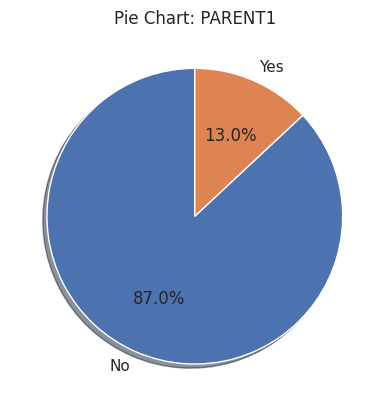

=====


MSTATUS
['Yes', 'No']
[6188, 4114]


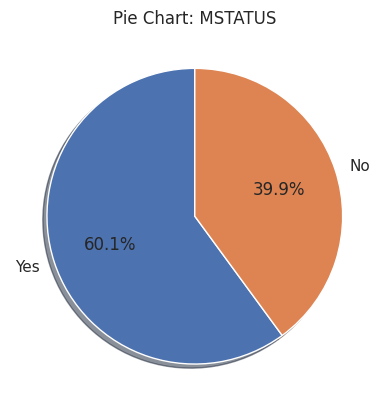

=====


SEX
['F', 'M']
[5545, 4757]


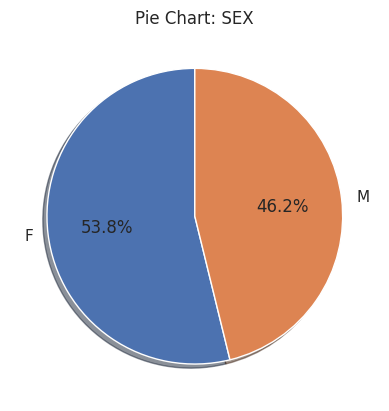

=====


EDUCATION
['d_High School', 'c_Bachelors', 'b_Masters', 'e_No_High School', 'a_PhD']
[2952, 2823, 2078, 1515, 934]


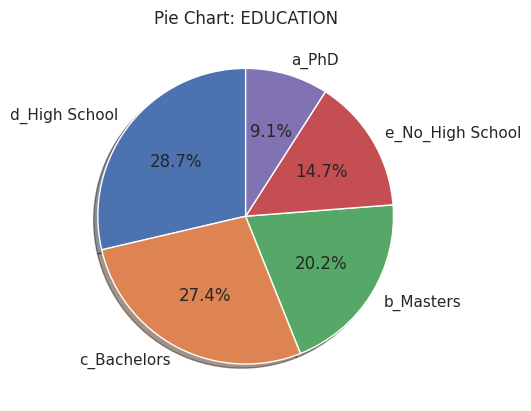

=====


JOB
['Blue Collar', 'Clerical', 'Professional', 'Manager', 'Lawyer', 'Student', 'Home Maker', nan, 'Doctor']
[2288, 1590, 1408, 1257, 1031, 899, 843, 665, 321]


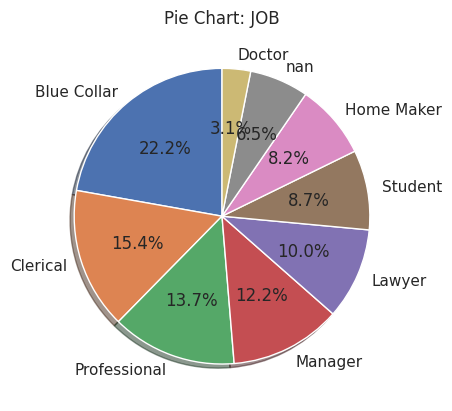

=====


CAR_USE
['Private', 'Commercial']
[6513, 3789]


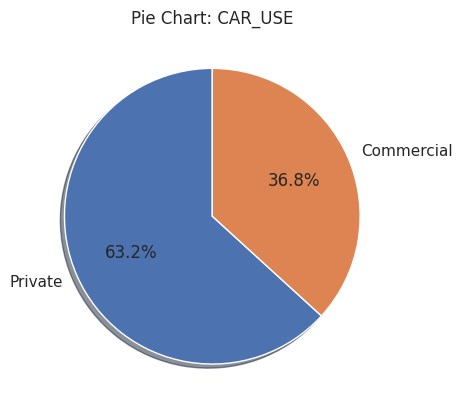

=====


CAR_TYPE
['SUV', 'Minivan', 'Pickup', 'Sports Car', 'Van', 'Panel Truck']
[2883, 2694, 1772, 1179, 921, 853]


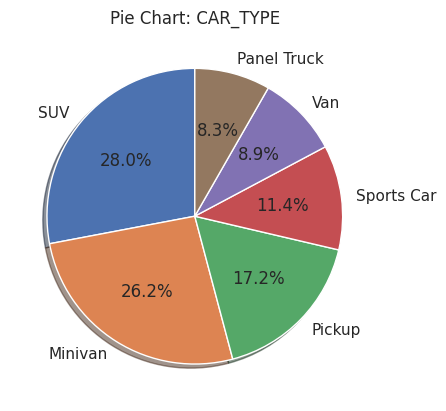

=====


RED_CAR
['no', 'yes']
[7326, 2976]


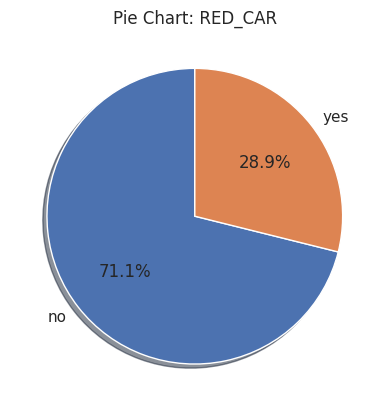

=====


REVOKED
['No', 'Yes']
[9041, 1261]


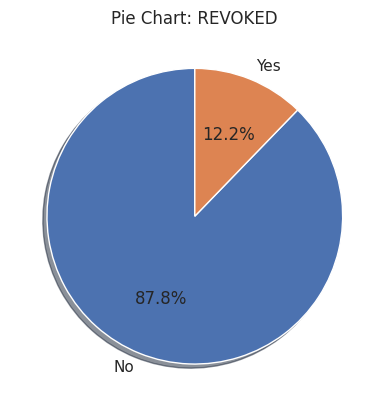

=====


URBANICITY
['Highly Urban/ Urban', 'Highly Rural/ Rural']
[8230, 2072]


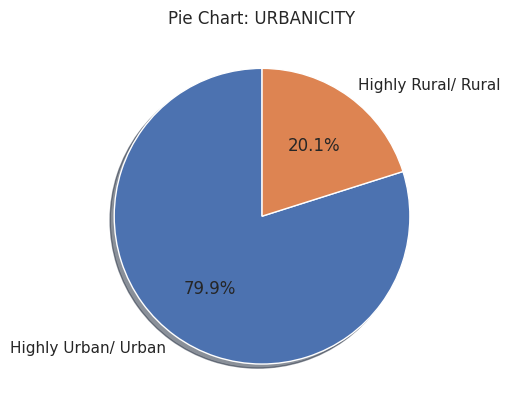

=====


['d_High School', 'c_Bachelors', 'b_Masters', 'e_No_High School', 'a_PhD']
[2952, 2823, 2078, 1515, 934]
[0, 0, 0.3, 0, 0]


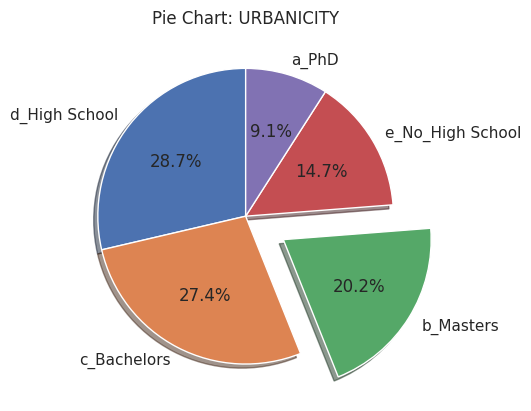

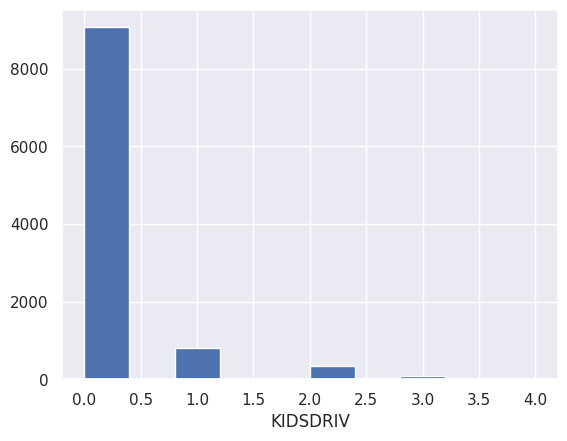

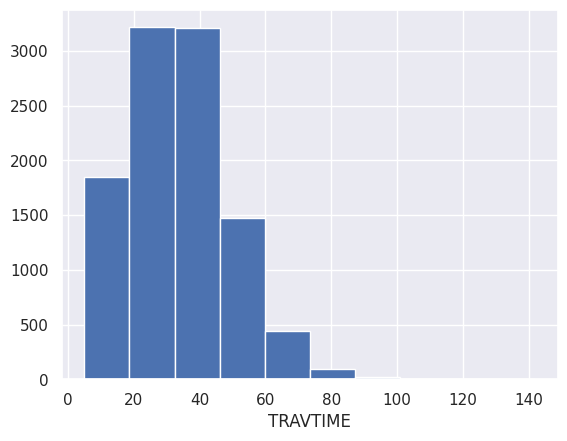

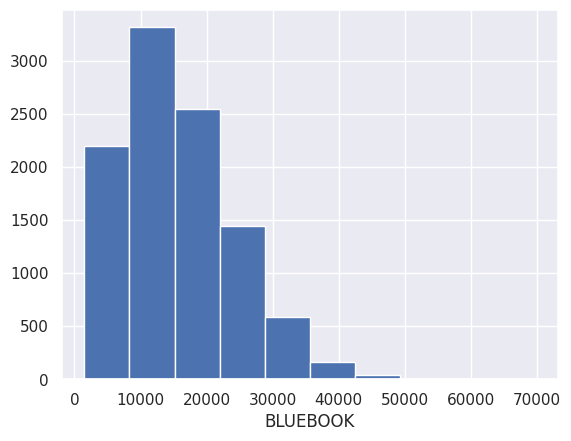

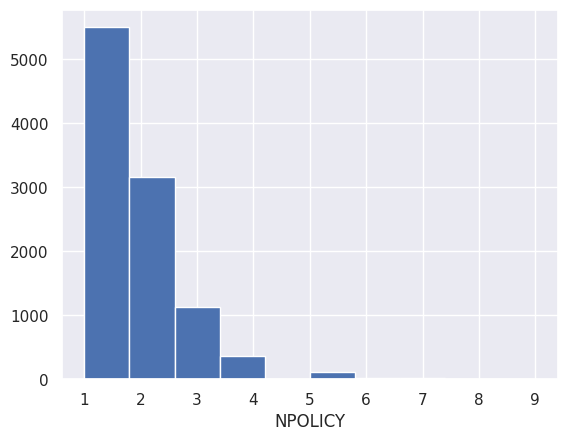

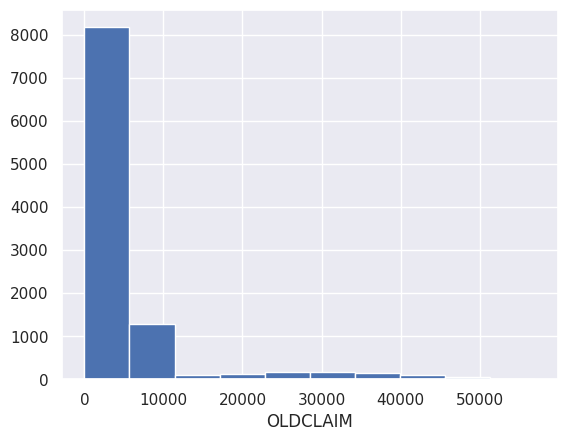

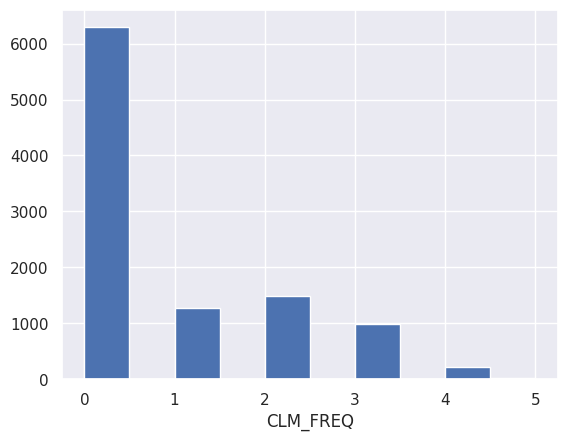

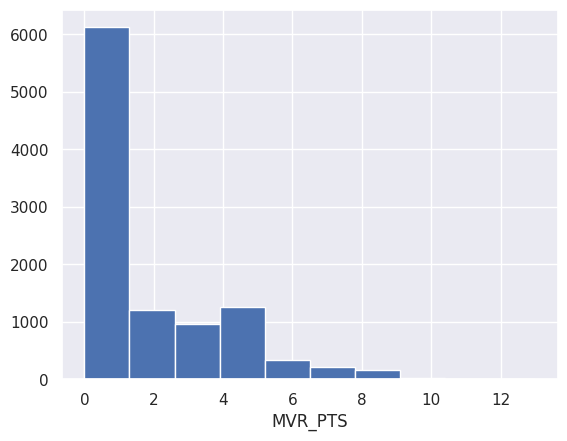

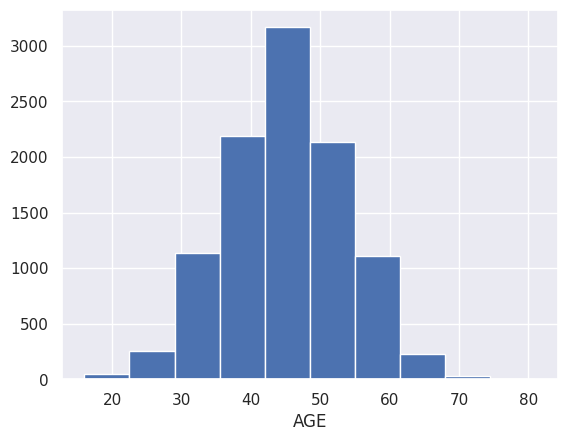

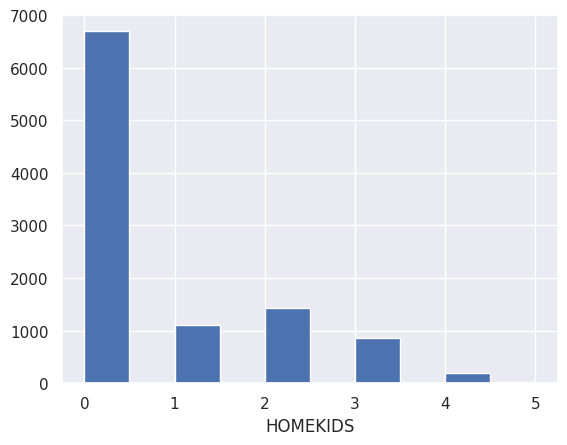

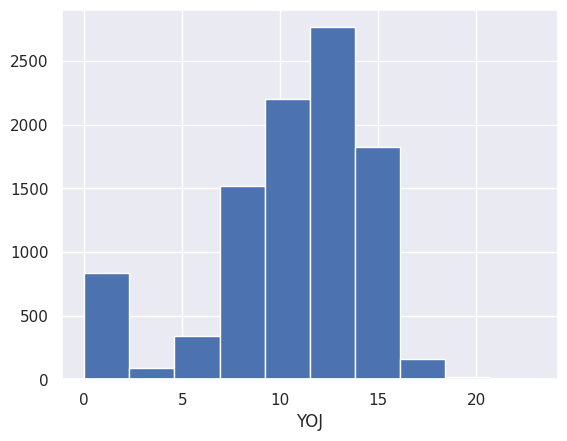

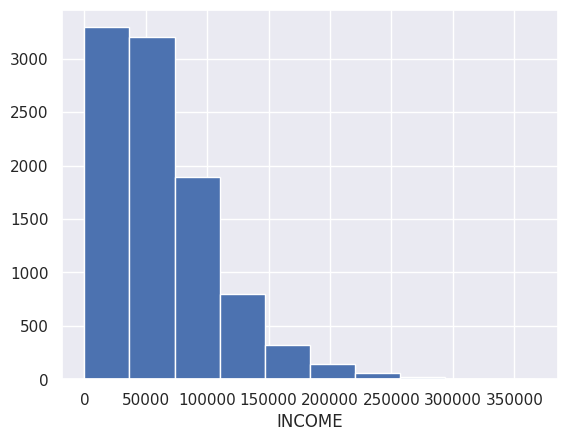

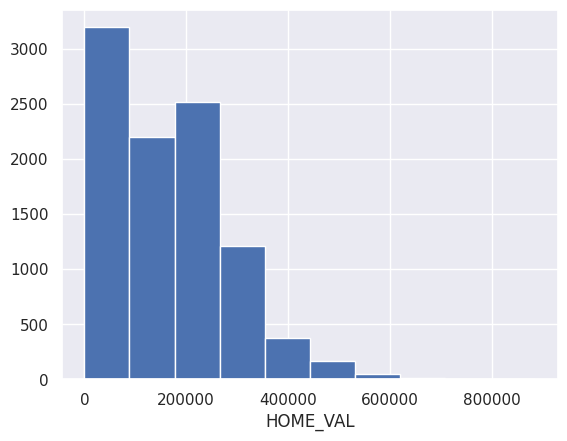

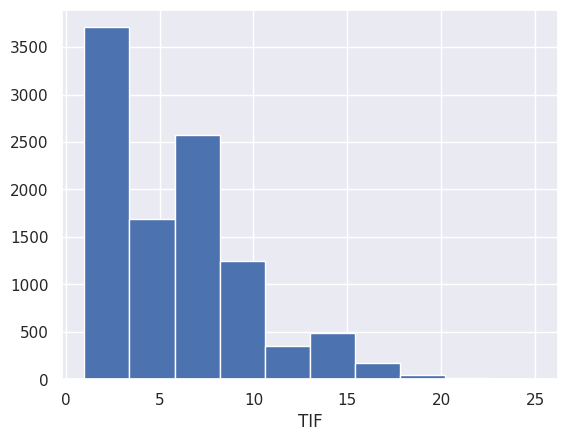

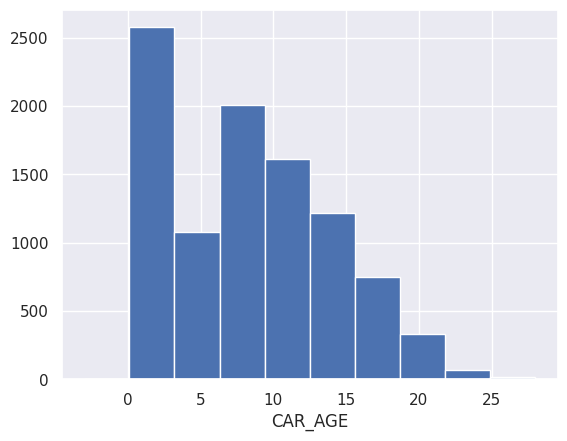

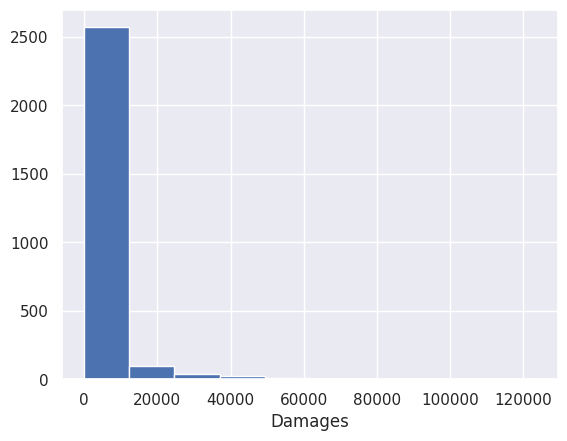

In [ ]:

'''
PIE CHARTS
'''

for i in objList :
   print(i)
   x = df[ i ].value_counts(dropna=False)
   #print( x )
   theLabels = x.axes[0].tolist()
   print( theLabels )
   theSlices = list(x)
   print( theSlices )
   plt.pie( theSlices,
            labels=theLabels,
            startangle = 90,
            shadow=True,
            autopct="%1.1f%%")
   plt.title("Pie Chart: " + i)
   plt.show()
   print("=====\n\n")


x = df["EDUCATION"].value_counts(dropna=False)
theLabels = x.axes[0].tolist()
theSlices = list(x)
explodeList = [ 0 for i in theSlices ]
explodeList[2] = 0.3
print( theLabels )
print( theSlices )
print( explodeList )
plt.pie( theSlices,
         labels=theLabels,
         startangle = 90,
         explode=explodeList,
         shadow=True,
         autopct="%1.1f%%")
plt.title("Pie Chart: " + i)
plt.show()




for i in intList :
   plt.hist( df[ i ] )
   plt.xlabel( i )
   plt.show()

for i in floatList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()

plt.hist( df[ TARGET_A ] )
plt.xlabel( "Damages" )
plt.show()




















